In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
from datetime import datetime, date, timedelta
warnings.filterwarnings('ignore')

In [111]:
df1=pd.read_csv('fear_greed_index.csv')
df2=pd.read_csv('historical_data.csv')

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

Data preparation:

In [ ]:
print("Sentiment dataset shape:", df1.shape)
print("Trader dataset shape:", df2.shape)


In [16]:
print("Missing values in sentiment dataset:")
print(df1.isna().sum())

print("\nMissing values in trader dataset:")
print(df2.isna().sum())

Missing values in sentiment dataset:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in trader dataset:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [17]:
print("Duplicate rows in sentiment dataset:", df1.duplicated().sum())
print("Duplicate rows in trader dataset:", df2.duplicated().sum())

Duplicate rows in sentiment dataset: 0
Duplicate rows in trader dataset: 0


In [112]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')
df2['Timestamp'] = pd.to_datetime(df2['Timestamp']).dt.time
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'], format='%d-%m-%Y %H:%M')
df2['trade_date'] = df2['Timestamp IST'].dt.date

In [93]:
df1['timestamp'] = pd.to_datetime(df1['timestamp']).dt.time

In [94]:
df1.head()


,timestamp,value,classification,date
0,00:00:01.517463,30,Fear,2018-02-01
1,00:00:01.517549,15,Extreme Fear,2018-02-02
2,00:00:01.517635,40,Fear,2018-02-03
3,00:00:01.517722,24,Extreme Fear,2018-02-04
4,00:00:01.517808,11,Extreme Fear,2018-02-05


In [64]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,00:28:50,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,00:28:50,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,00:28:50,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,00:28:50,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,00:28:50,2024-12-02


In [117]:
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 0,
    'Neutral': 1,
    'Greed': 2,
    'Extreme Greed': 2
}

In [118]:
df1['sentiment_score'] = df1['classification'].map(sentiment_map)

In [122]:
fg_df = df1[['date','sentiment_score', 'classification']]
hd_df = df2[['Account','Coin','Execution Price','Size Tokens','Size USD','Side','Closed PnL','Direction','trade_date']]

In [123]:
df2['trade_date'] = pd.to_datetime(df2['trade_date'], errors='coerce').dt.date
df1['date'] = pd.to_datetime(df1['date'], errors='coerce').dt.date

In [124]:
# Merge the two DataFrames on the date columns
merged_df = pd.merge(
    df2,
    df1,
    left_on='trade_date',
    right_on='date',
    how='left'
)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [159]:
merged_df.to_csv('merged_data.csv', index=False)
# Save the merged DataFrame to a CSV file

In [160]:
merged_df[['Closed PnL', 'Account', 'trade_date']].isna().sum()

Closed PnL    0
Account       0
trade_date    0
dtype: int64

In [161]:
merged_df['classification'].value_counts()

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [138]:
#Daily PnL per trader
daily_pnl = (
    merged_df
    .groupby(['Account', 'trade_date'])['Closed PnL']
    .sum()
    .reset_index(name='daily_pnl')
)

In [207]:
merged_df = merged_df.merge(daily_pnl,on=['Account', 'trade_date'],how='left')

In [208]:
merged_df[['daily_pnl']].describe()


,daily_pnl
count,211224.000000
mean,16263.381932
std,67441.941675
min,-358963.139984
25%,111.696584
50%,2270.124102
75%,9609.447365
max,533974.662903


In [162]:
#Win / Loss & Win Rate
merged_df['is_win'] = merged_df['Closed PnL'] > 0

In [175]:
#Account-level win rate
win_rate = (
    merged_df
    .groupby('Account')['is_win']
    .mean()
    .reset_index(name='win_rate')
)



In [178]:
merged_df[['win_rate']].describe()

,win_rate
count,211224.000000
mean,0.411265
std,0.108788
min,0.234987
25%,0.345787
50%,0.428230
75%,0.438611
max,0.810876


In [179]:
#Trade frequency (behavior metrics)
#Trades per trader per day
trades_per_day = (
    merged_df
    .groupby(['Account', 'trade_date'])
    .size()
    .reset_index(name='trades_per_day')
)

In [180]:
merged_df = merged_df.merge(
    trades_per_day,
    on=['Account', 'trade_date'],
    how='left'
)

In [181]:
merged_df['trades_per_day'].describe()

count    211224.000000
mean        600.474084
std         814.291455
min           1.000000
25%         100.000000
50%         306.000000
75%         744.000000
max        4083.000000
Name: trades_per_day, dtype: float64

In [195]:
#long/short behaviour

merged_df['Side'] = merged_df['Side'].replace({
    'LONG': 'Buy',
    'SHORT': 'Sell',
    'BUY': 'Buy',
    'SELL': 'Sell'
})

In [198]:
ls_ratio = (
    merged_df
    .groupby(['trade_date', 'classification', 'Side'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)
ls_ratio['long_short_ratio'] = (
    ls_ratio['Buy'] / (ls_ratio['Sell'] + 1)
)


In [199]:
ls_ratio.groupby('classification')['long_short_ratio'].mean()


classification
Extreme Fear     1.141476
Extreme Greed    1.686797
Fear             3.229182
Greed            2.720932
Neutral          2.533303
Name: long_short_ratio, dtype: float64

In [200]:
#Frequent vs Infrequent traders
merged_df['freq_segment'] = pd.qcut(
    merged_df['trades_per_day'],
    q=2,
    labels=['Infrequent', 'Frequent']
)

In [204]:
merged_df['freq_segment'].value_counts()

freq_segment
Infrequent    105945
Frequent      105279
Name: count, dtype: int64

In [216]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,is_win,win_rate_x,win_rate_y,win_rate,daily_pnl_y,trades_per_day_x,trades_per_day_y,trades_per_day,freq_segment,daily_pnl
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,Buy,2024-12-02 22:50:00,0.000000,Buy,0.0,...,False,0.408526,0.408526,0.408526,0.0,44,44,44,Infrequent,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,Buy,2024-12-02 22:50:00,986.524596,Buy,0.0,...,False,0.408526,0.408526,0.408526,0.0,44,44,44,Infrequent,0.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,Buy,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,False,0.408526,0.408526,0.408526,0.0,44,44,44,Infrequent,0.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,Buy,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,False,0.408526,0.408526,0.408526,0.0,44,44,44,Infrequent,0.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,Buy,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,False,0.408526,0.408526,0.408526,0.0,44,44,44,Infrequent,0.0


In [209]:
#PnL vs Sentiment
merged_df.groupby('classification')['daily_pnl'].mean()

classification
Extreme Fear     14336.003978
Extreme Greed    16647.639003
Fear             30837.801624
Greed             4016.075190
Neutral           9379.109480
Name: daily_pnl, dtype: float64

In [211]:
#Win rate vs Sentiment
merged_df.groupby('classification')['win_rate'].mean()

classification
Extreme Fear     0.417011
Extreme Greed    0.424287
Fear             0.419585
Greed            0.391947
Neutral          0.406333
Name: win_rate, dtype: float64

In [224]:
import os
os.makedirs("charts", exist_ok=True)

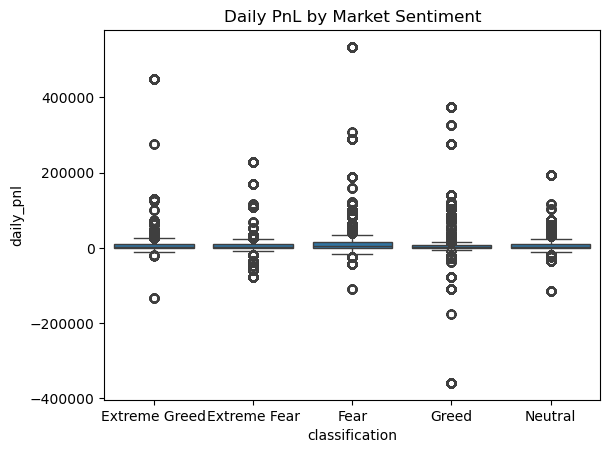

In [226]:
#Daily PnL by Market Sentiment
sns.boxplot(data=merged_df, x='classification', y='daily_pnl')
plt.title("Daily PnL by Market Sentiment")
plt.savefig("charts/daily_pnl_by_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

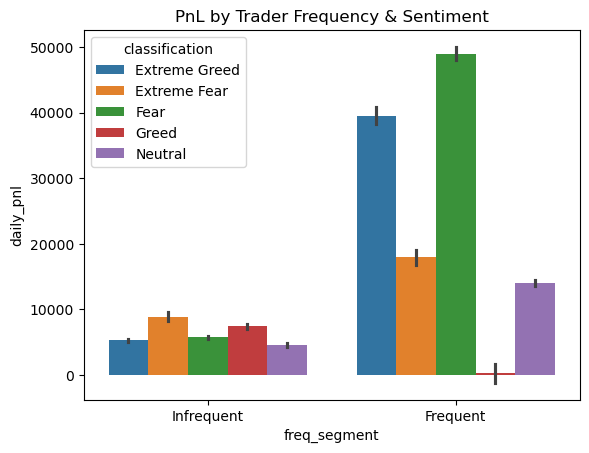

In [227]:
#PnL by Trader Frequency and Sentiments
sns.barplot(data=merged_df, x='freq_segment', y='daily_pnl', hue='classification')
plt.title("PnL by Trader Frequency & Sentiment")
plt.savefig("charts/PnL by Trader Frequency and Sentiments.png", dpi=300, bbox_inches='tight')
plt.show()

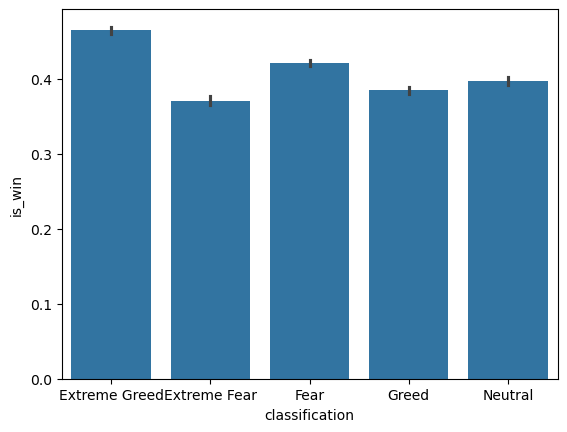

In [228]:
#Win rate Vs Sentiment
sns.barplot(data=merged_df, x='classification', y='is_win')
plt.savefig("charts/Win rate Vs Sentiment.png", dpi=300, bbox_inches='tight')


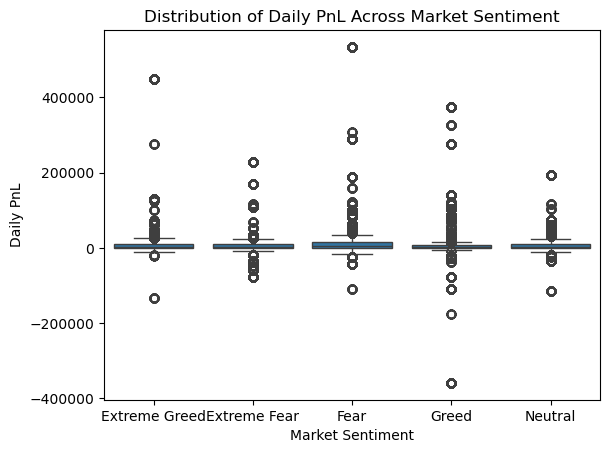

In [229]:
#Distribution of Daily PnL Across Market Sentiment
sns.boxplot(
    data=merged_df,
    x='classification',
    y='daily_pnl'
)
plt.title("Distribution of Daily PnL Across Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Daily PnL")
plt.savefig("charts/Distribution of Daily PnL Across Market Sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

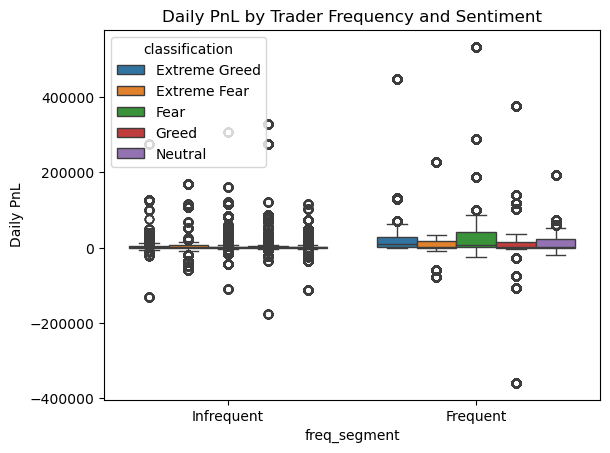

In [230]:
#Daily PnL by Trader Frequency and Sentiment
sns.boxplot(
    data=merged_df,
    x='freq_segment',
    y='daily_pnl',
    hue='classification'
)
plt.title("Daily PnL by Trader Frequency and Sentiment")
plt.ylabel("Daily PnL")
plt.savefig("charts/Daily PnL by Trader Frequency and Sentiment.png", dpi=300, bbox_inches='tight')
plt.show()